In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
mnist = keras.datasets.mnist

In [5]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [6]:
train_features.shape

(60000, 28, 28)

In [7]:
test_features.shape

(10000, 28, 28)

5


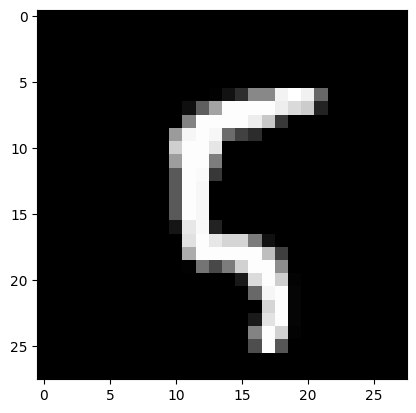

In [8]:
idx = 100
img = train_features[idx]

print(train_labels[idx])

plt.gray()
plt.imshow(img)

In [9]:
np.min(img), np.max(img)

(np.uint8(0), np.uint8(255))

In [10]:
train_features = train_features/225.0
test_features = test_features/225.0

In [11]:
img = test_features[0]
img.shape

(28, 28)

In [12]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

I0000 00:00:1756549864.689648     909 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [14]:
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
hist = model.fit(train_features, train_labels, epochs=250, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.5531e-09 - val_accuracy: 0.9801 - val_loss: 0.2470
Epoch 2/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.5610e-09 - val_accuracy: 0.9803 - val_loss: 0.2487
Epoch 3/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.5352e-09 - val_accuracy: 0.9802 - val_loss: 0.2475
Epoch 4/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.6325e-09 - val_accuracy: 0.9801 - val_loss: 0.2475
Epoch 5/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.5034e-09 - val_accuracy: 0.9802 - val_loss: 0.2493
Epoch 6/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.5948e-09 - val_accuracy: 0.9800 - val_loss: 0.2491
Epoch 7/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.5709e-09 - val_accuracy: 0.9800 - val_loss: 0.2494
Epoch 8/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.00

In [21]:
model.evaluate(test_features, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.2476


[0.24759003520011902, 0.9803000092506409]

In [17]:
idx = 100
img = test_features[idx]
print(test_labels[idx])

6


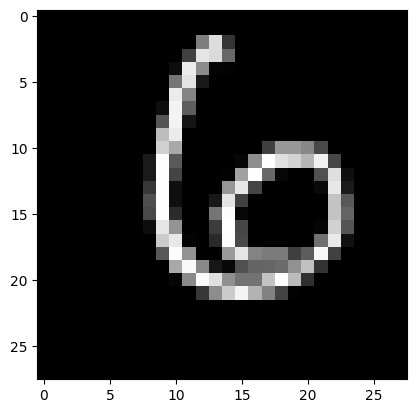

In [18]:
plt.gray()
plt.imshow(img)

In [19]:
model.predict(np.expand_dims(img, axis=0)) # Add np.expand_dims to add the batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


array([[1.2210620e-25, 6.7028456e-27, 9.3762171e-26, 7.1298066e-42,
        8.9365007e-41, 8.0244149e-23, 1.0000000e+00, 2.4242463e-43,
        1.5775458e-25, 5.6051939e-45]], dtype=float32)

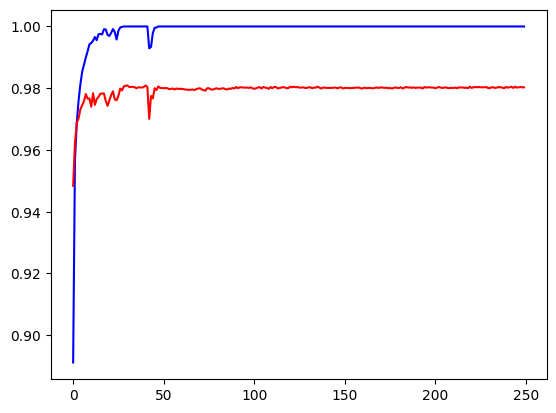

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.show()